In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importing and Inspecting Data

In [2]:
df = pd.read_csv('C:/Users/Chidinma Kalu/Documents/Datascience-Hamoye/StageF/data.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.shape

(4600, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
#the data type of date is shown as object, so we need to convert it to datetime format using the line of code below
df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [8]:
#checking for missing values 
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [9]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## 2. Exploratory Data analysis and Visualization

Let's compare the relationship of each of the features with price and see how they are correlated. The aim is to discover the following:

    which of the features has the highest correlation with price
    which of the features has the least correlation with price
    which features has high influence on price
    which features has negligible correlation with price

In [10]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


From the correlation table above, 
    
    The feature with the highest correlation with price is sqft_living
    The feature with the least correlation is yr_renovated
    Features with high influence on price include: sqft_living, sqft_above, bathrooms and view.
    Features with negligible correlation with price include: yr_renovated, yr_built, condition and sqft_lot.

### Let's further divide the data into categorical and numerical features, so we can also ascertain the relationship between the categorical features and price.

In [11]:
#define categorical features
df_categ = df.select_dtypes(include = ['object']).keys()
df_categ

Index(['street', 'city', 'statezip', 'country'], dtype='object')

In [12]:
#define numerical features
df_numeric = df.select_dtypes(include = ['int64', 'float64']).keys()
df_numeric

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [13]:
#define datetime feature
df_date = df.select_dtypes(include = ['datetime64']).keys()
df_date

Index(['date'], dtype='object')

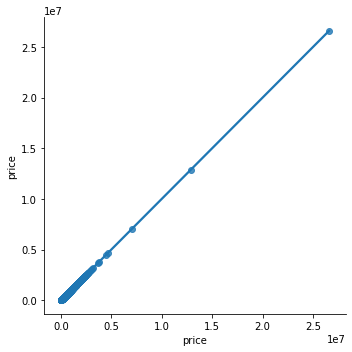

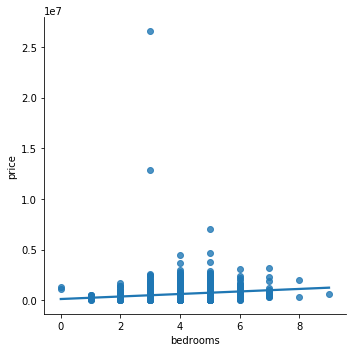

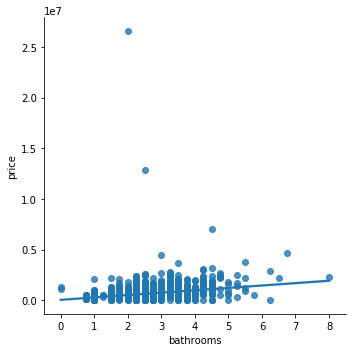

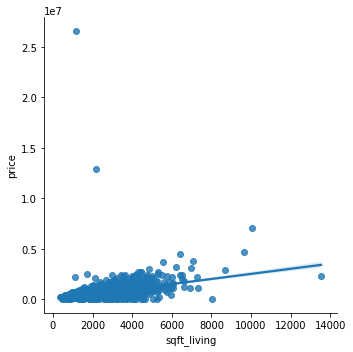

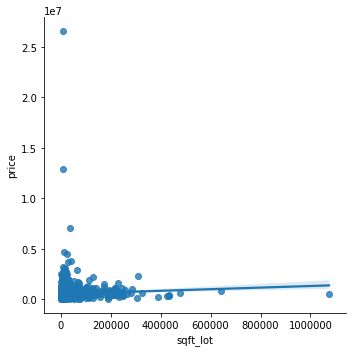

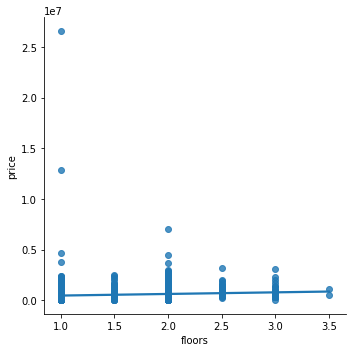

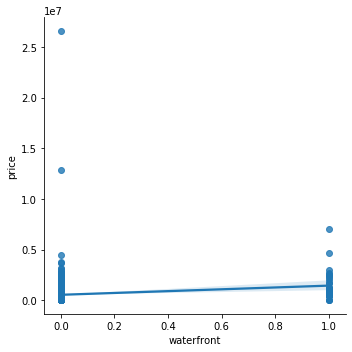

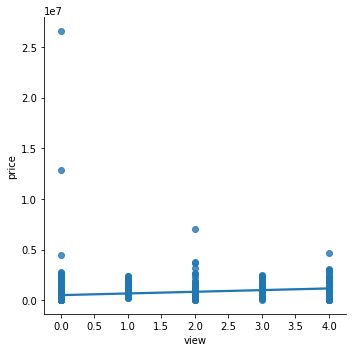

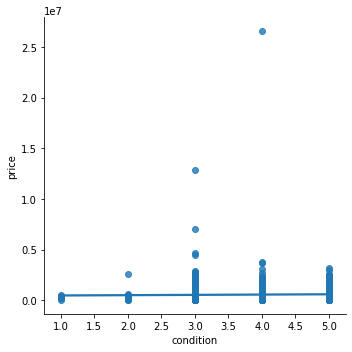

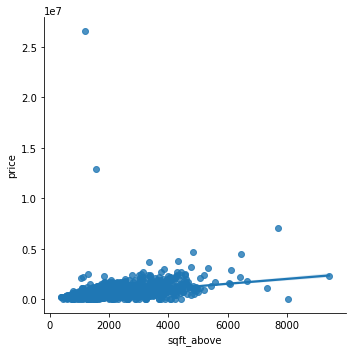

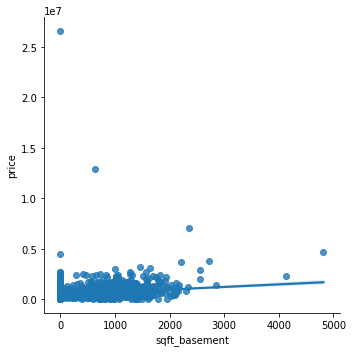

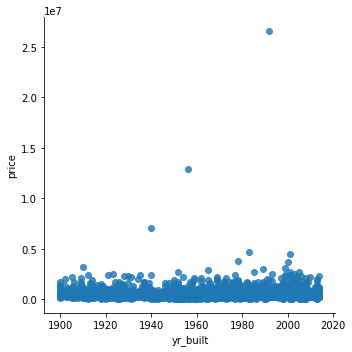

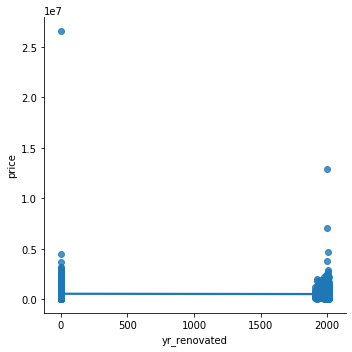

In [14]:
#let's explore more on numerical features using plots
for i in df_numeric:
    sns.lmplot(x = i, y = 'price', data = df)

From the visualization above, we can see that yr_renovated, yr_built and condition have negligible influence on the price while sqft_living(area of the living room), sqft_above and bathroom have strong relationship with price.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E17B4AAA88>,
      dtype=object)

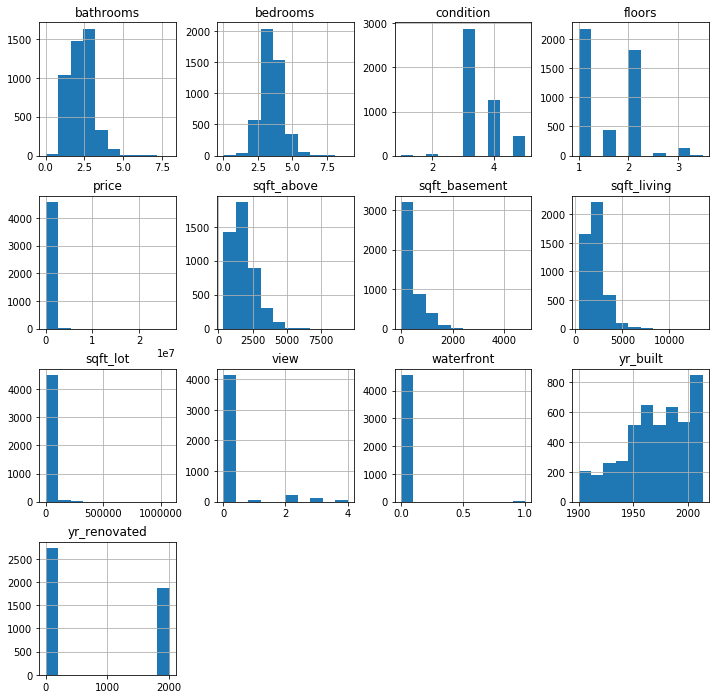

In [15]:
#Histogram plots of each of the numerical features
from pylab import rcParams
rcParams['figure.figsize'] = 12, 12
df[df_numeric].hist()

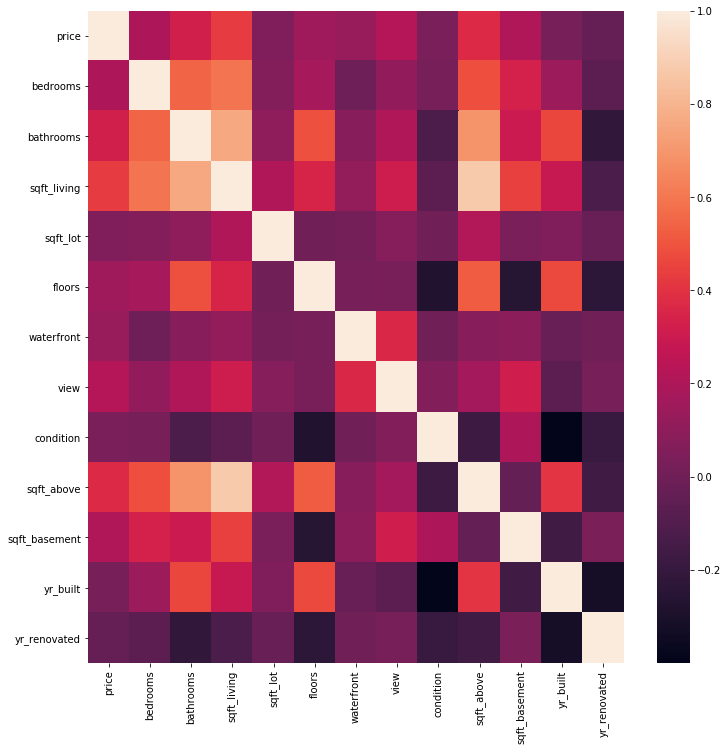

In [16]:
#more visualization using heatmap to show the correlation between numeric features
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr())

The heatmap also shows the correlation of price and other features in the dataset. It still shows that sqft_living, sqft_above and bathrooms have great influence on the price of a house. 

### Let's go further by exploring the relationship between the categorical data and price of the house. 

In [17]:
df_categ

Index(['street', 'city', 'statezip', 'country'], dtype='object')

In [18]:
#let's inspect the unique cities
df.city.unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [19]:
df.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Vashon                   29
Tukwila                  29
SeaTac                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Fall City                11
Medina                   11
Clyde Hill               11
Black Diamond             9
Ravensdale                7
Pacific             

In [20]:
#let's inspect the country
df.country.unique()

array(['USA'], dtype=object)

We have same country 'USA' for all data entries and as such it doesn't really have any effect on the price of a house. We can easily drop the country feature since it is same for all entries.

In [21]:
#let's check out the statezip categorical feature
df.statezip.unique()

array(['WA 98133', 'WA 98119', 'WA 98042', 'WA 98008', 'WA 98052',
       'WA 98115', 'WA 98038', 'WA 98045', 'WA 98155', 'WA 98105',
       'WA 98074', 'WA 98106', 'WA 98007', 'WA 98092', 'WA 98198',
       'WA 98006', 'WA 98102', 'WA 98011', 'WA 98125', 'WA 98003',
       'WA 98136', 'WA 98033', 'WA 98029', 'WA 98117', 'WA 98034',
       'WA 98072', 'WA 98023', 'WA 98107', 'WA 98166', 'WA 98116',
       'WA 98024', 'WA 98055', 'WA 98077', 'WA 98027', 'WA 98059',
       'WA 98075', 'WA 98014', 'WA 98065', 'WA 98199', 'WA 98053',
       'WA 98058', 'WA 98122', 'WA 98103', 'WA 98112', 'WA 98005',
       'WA 98118', 'WA 98177', 'WA 98004', 'WA 98019', 'WA 98144',
       'WA 98168', 'WA 98001', 'WA 98056', 'WA 98146', 'WA 98028',
       'WA 98148', 'WA 98057', 'WA 98040', 'WA 98010', 'WA 98051',
       'WA 98031', 'WA 98109', 'WA 98030', 'WA 98126', 'WA 98032',
       'WA 98178', 'WA 98288', 'WA 98108', 'WA 98070', 'WA 98188',
       'WA 98002', 'WA 98039', 'WA 98022', 'WA 98068', 'WA 980

In [22]:
df.statezip.value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [23]:
#let's explore the street 
df.street.unique()

array(['18810 Densmore Ave N', '709 W Blaine St',
       '26206-26214 143rd Ave SE', ..., '759 Ilwaco Pl NE',
       '5148 S Creston St', '18717 SE 258th St'], dtype=object)

In [24]:
#let us see the description of the entire dataset 
df.describe(include = 'all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600
first,2014-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2014-07-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN


we have 4525 unique values for the street in the dataset, this means that just 75 entries of the street feature are repeated.  
we have 77 unique states in the dataset, and 44 unique cities.

The street where a house is located may not have so much effect on the price of the house in this dataset since most of the entries have unique values for the streets.

The house pricing entries started from 2014-05-02 and ended 2014-07-10 (2nd of may 2014 to 10th of july 2014).

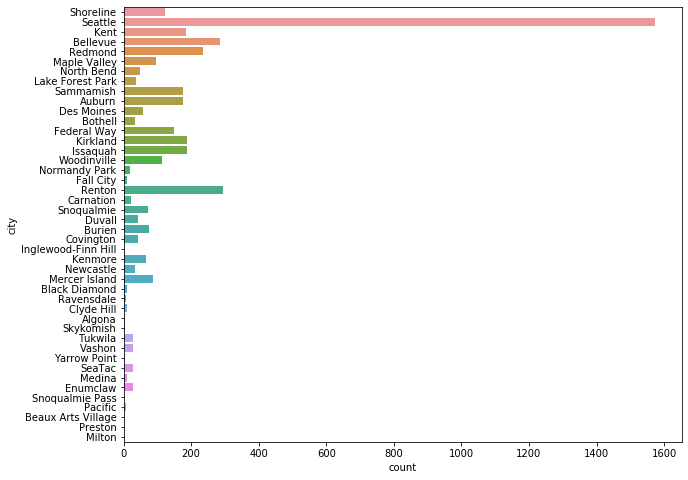

In [25]:
rcParams['figure.figsize'] = 10, 8
sns.countplot(y = df['city'])

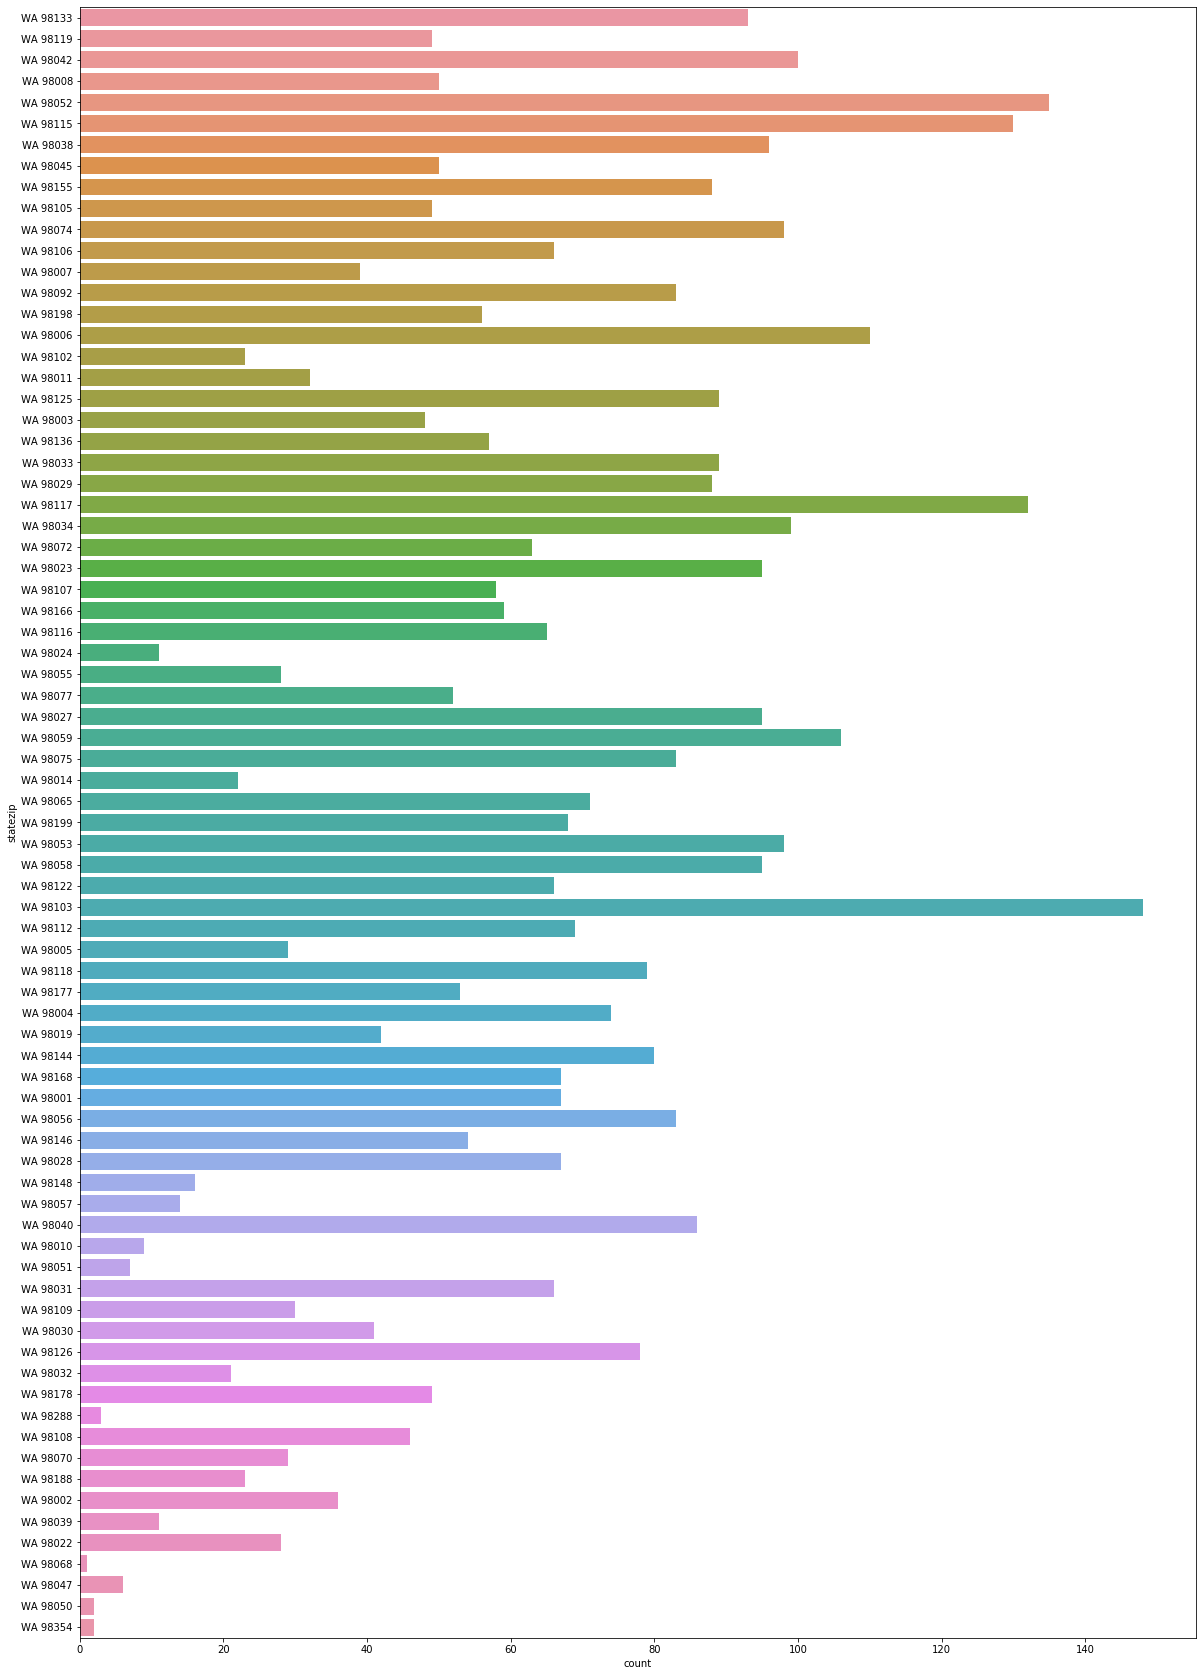

In [26]:
rcParams['figure.figsize'] = 20, 30
sns.countplot(y = df['statezip'])

### We will select cities that has more than 100 entries, then we will go ahead to check or inspect the influence of some of the features on the price of houses in different cities.

In [27]:
cities = ['Seattle', 'Renton', 'Bellevue', 'Redmond', 'Kirkland', 'Issaquah', 'Kent', 'Auburn', 
          'Sammamish', 'Federal Way', 'Shoreline', 'Woodinville']

In [28]:
df_new = df[df.city.isin(cities)]
#take a sample of the dataset
df_new = df_new.sample(n = 1500)

#### First, let's consider the influence of sqft_living on the price of houses in different cities
    It is assumed that the larger the area of the living room, the more costly a house could be. we take a look at the area of the living room plotted against house prices for different cities.

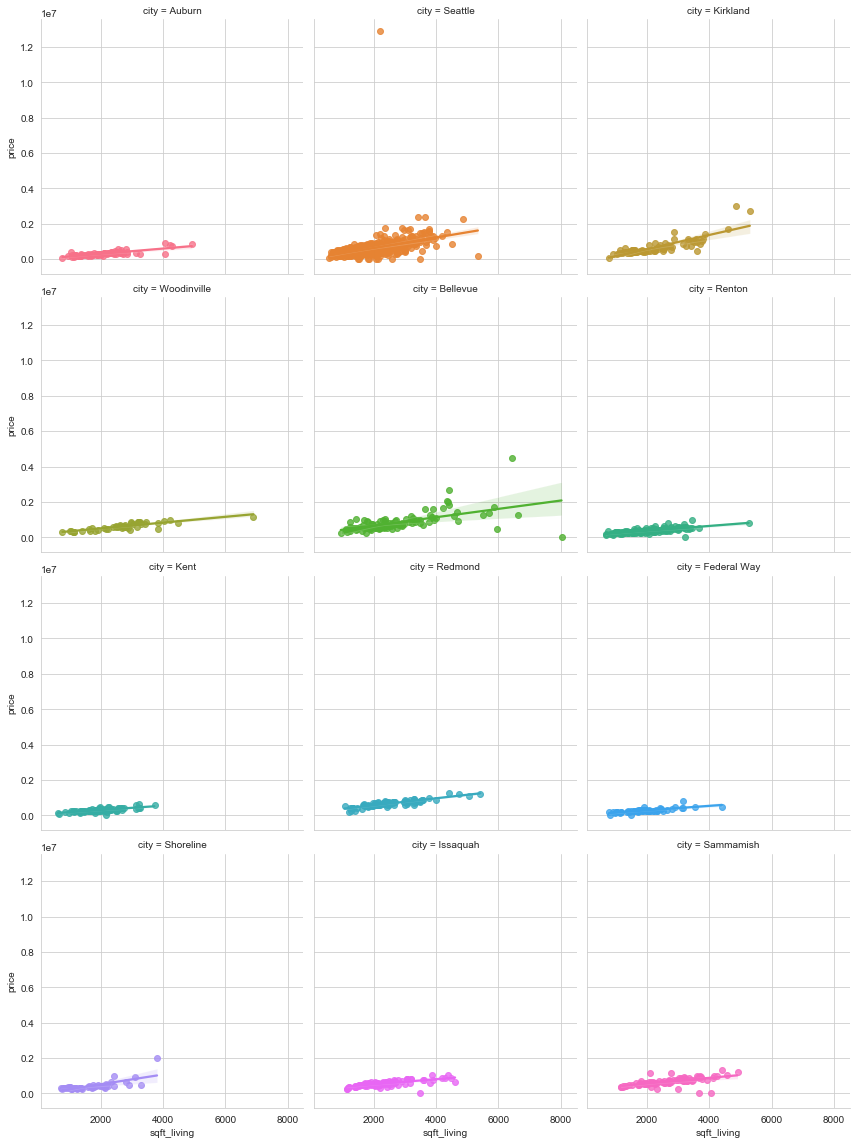

In [33]:
sns.set_style('whitegrid')
plot=sns.lmplot(x ='sqft_living', y ='price', data = df_new, col='city', hue ='city',height=4,col_wrap=3) 

From the plot, we can observe that the area of the living room has very high correelation with price in different cities except for Bellevue and Sammamish which has negative correlation with house price. 

#### Secondly, let's compare the influence of the number of bedrooms on the price of houses in different cities.
    it is expected that the higher the number of bedrooms, the higher price. we will use a lmplot to compare the price of houses in different cities considering the number of bedrooms.

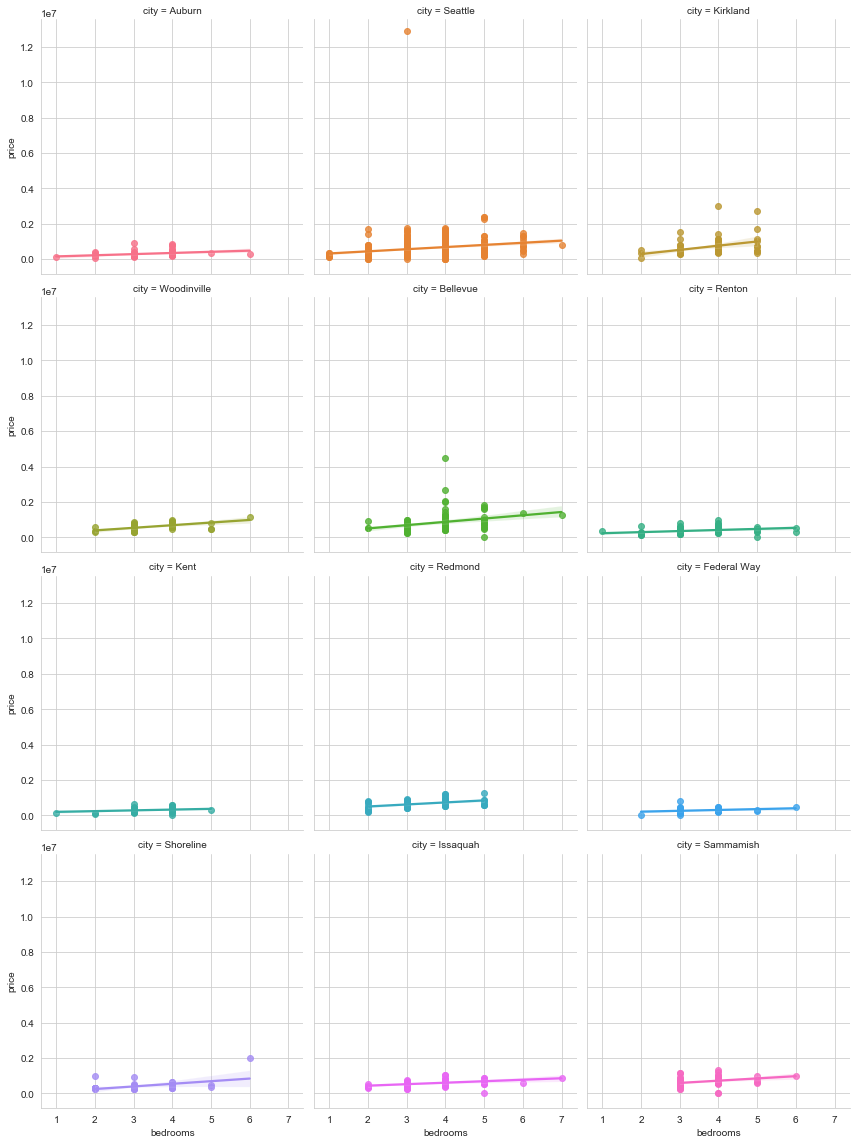

In [34]:
plot=sns.lmplot(x ='bedrooms', y ='price', data = df_new, col='city', hue ='city',height = 4, col_wrap=3) 

From the plot, the influence of the number of bedrooms on price varies for differnt cities. In Shoreline,Kent,Redmond,Auburn,Federal Way,Woodinville,Renton,Issaquah and Kirkland bedrooms have strong influence on prices wheras in Sammamish and Seattle bedrooms have a little influence on house price. In Bellevue there is no significant impact of bedrooms in house prices.

#### Next, let's compare the influence of the number of bathrooms on the price of houses in different cities.
        The number of bathrooms may or may not have influence on house prices. we will plot the house prices against number of bathrooms for different cities to see the relationship

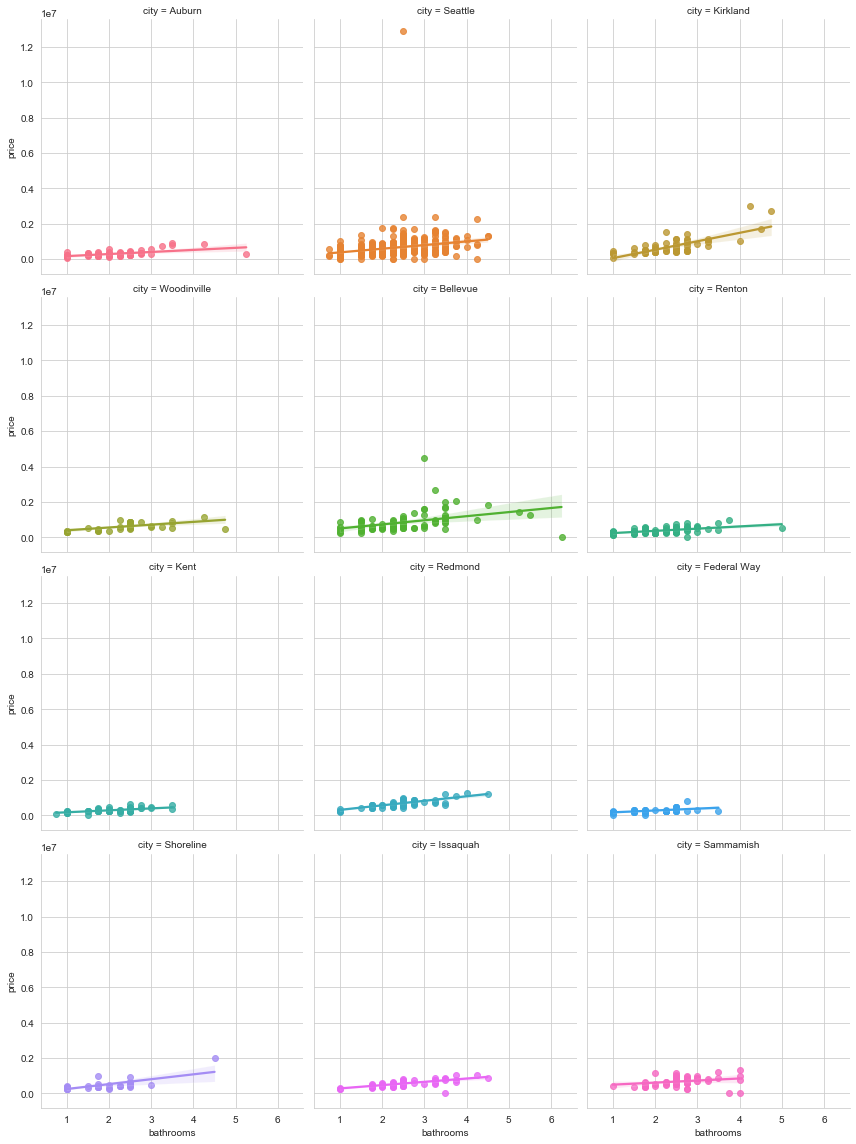

In [35]:
plot=sns.lmplot(x ='bathrooms', y ='price', data = df_new, col='city', hue ='city',height=4,col_wrap=3) 

It is clearly seen that number of bathrooms on house price is different in different cities. In Shoreline,Kent, Redmond,Federal Way,Kirkland,Woodinville,Renton, Issaquah number of bathrooms has strong positive influence on house price. In Seattle and Auburn have a little positive impact whereas in Bellevue and Sammamish number of bathrooms has negative impact on house price.

#### Finally, we will consider the influence of the number of bedrooms on the price of houses in different cities.

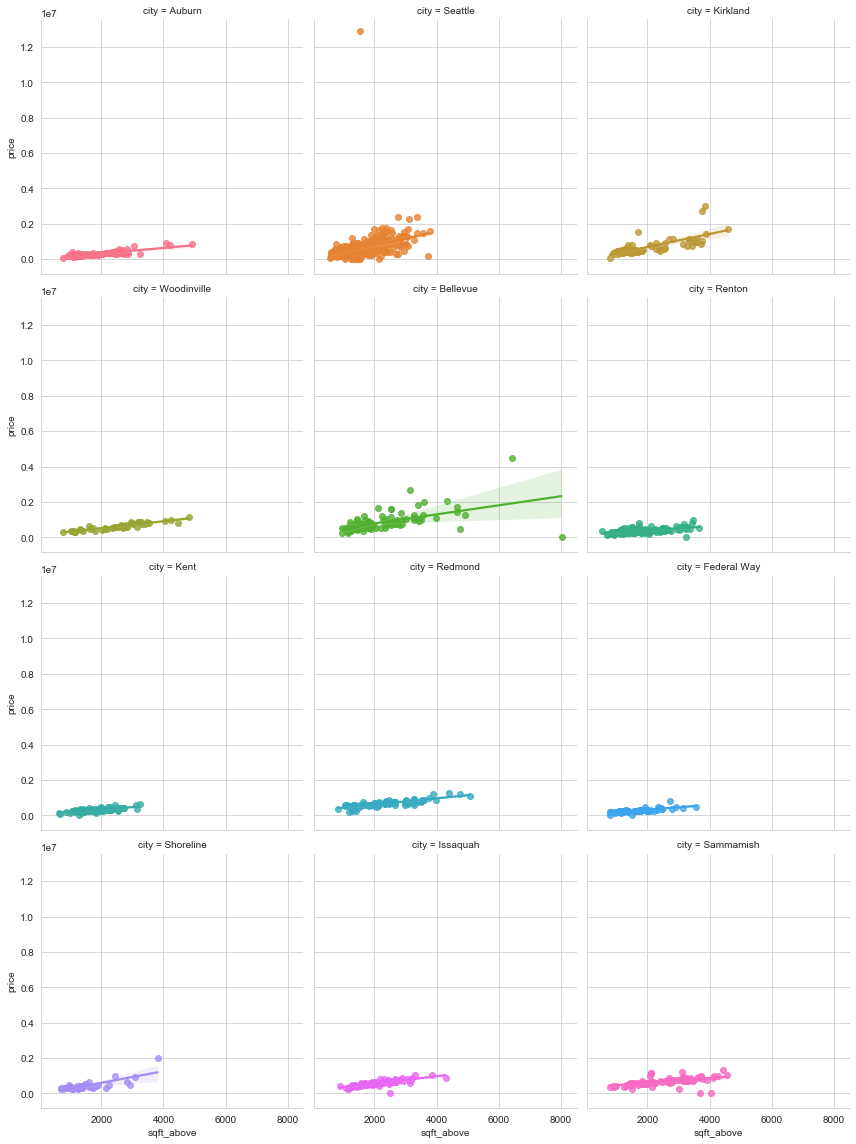

In [36]:
plot=sns.lmplot(x ='sqft_above', y ='price', data = df_new, col='city', hue ='city',height=4,col_wrap=3) 

From above visualization we can see that area of rooftop can be a good predictor of house price. In Bellevue area of rooftop has negative impact on house price. In rest of the cities area of rooftop has a strong positive influence.